In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [3]:
"""KMEANS CLUSTERING (BLobs Dataset) — STEP 0
🎯 Goal

Understand KMeans clustering on a dataset that has clear, well-separated clusters and observe a high silhouette score.

This is purely for learning intuition."""

'KMEANS CLUSTERING (BLobs Dataset) — STEP 0\n🎯 Goal\n\nUnderstand KMeans clustering on a dataset that has clear, well-separated clusters and observe a high silhouette score.\n\nThis is purely for learning intuition.'

In [4]:
#step 1 - import libraries and datasets
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

#step 1.2 generatte dataset
X, _ =make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

#make_blobs creates fake clustered data, and _ means we intentionally ignore the true labels.

"""What this does (easy)

Creates 500 data points
With 4 natural clusters
_ means we ignore true labels (unsupervised"""

#step 1.3 convert to df
df_blobs = pd.DataFrame(X, columns=["feature_1","feature_2"])
df_blobs.head()

,feature_1,feature_2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


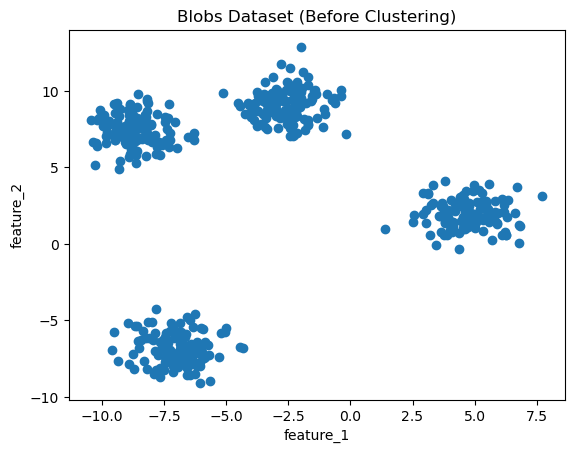

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df_blobs["feature_1"], df_blobs["feature_2"])
plt.title("Blobs Dataset (Before Clustering)")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()


In [6]:
#step 2 scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_blobs)


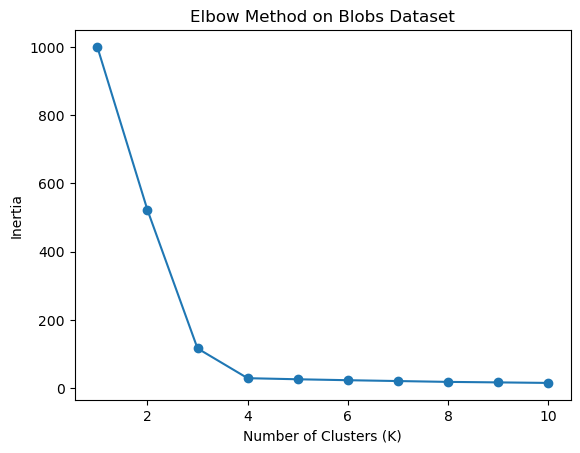

In [7]:
"""BLOBS CLUSTERING — STEP 3
Elbow Method (Choose K)
🎯 Goal of Step 3

Decide the number of clusters (K) using the elbow method."""
from sklearn.cluster import KMeans

#step 3.2 compute inertia of different k
inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# step 3.3 plot elbow curve
plt.plot(range(1, 11), inertia_values, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method on Blobs Dataset")
plt.show()

In [10]:
"""Goal of Step 4

Train KMeans with K = 4, assign cluster labels, and see the clusters visually.

This is where everything clicks."""
k = 4

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

clusters = kmeans.fit_predict(X_scaled)

#step 4.2 add cluster label to df
df_blobs["cluster"] = clusters
df_blobs.head()

,feature_1,feature_2,cluster
0,-7.689054,6.620346,1
1,-9.576514,-6.934404,2
2,6.829682,1.164871,0
3,-2.901306,7.550771,3
4,-5.678413,-7.288185,2


In [12]:
#step 3 -  silhouette Score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, clusters)
sil_score

0.7979185955370356

In [ ]:
"""Blobs Dataset

Silhouette ≈ 0.80

Clear separation

Strong natural groups

👉 Correct conclusion:

Dataset is perfect for clustering"""